# Read and plot spatial data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

In [2]:
data = np.load(r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\theilslopes_DTW.npz')
print(data.files)

['dtw_syr', 'dtw_condyr', 'dtw_s_nmax_yr', 'dtw_nmax_yr', 'dtw_vyr', 'dtw_tyr', 'dtw_resyr', 'HydroID', 'lat', 'lon', 'dtw_interc_t', 'dtw_slop_t']


In [3]:
lat    = data.f.lat
lon    = data.f.lon
icond  = data.f.dtw_condyr
tslope = data.f.dtw_slop_t
#lat = data.f.lat
#lat = data.f.lat
#lat = data.f.lat
#lat = data.f.lat
#lat = data.f.lat
ipass = np.where(icond==1)[0]

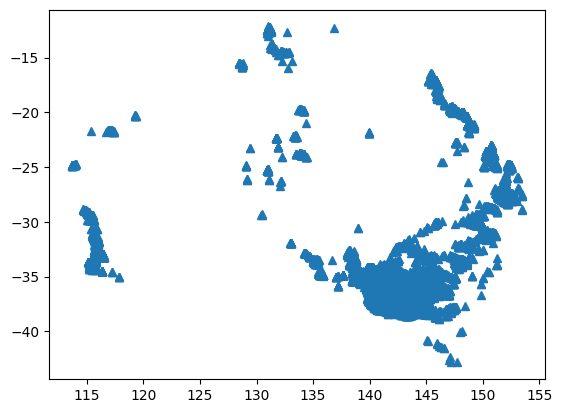

In [4]:
plt.plot(lon[ipass],lat[ipass],'^')
plt.show()

# Create grid and find # BH in grid

C:\Users\AFANDINOP\AppData\Local\Temp\ipykernel_25048\2751816559.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(X,Y,s=100,c=np.log10(bcnt))


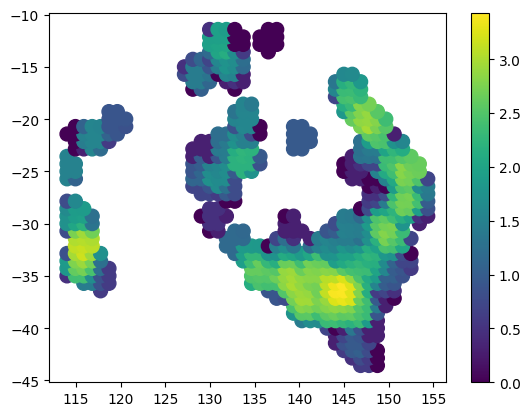

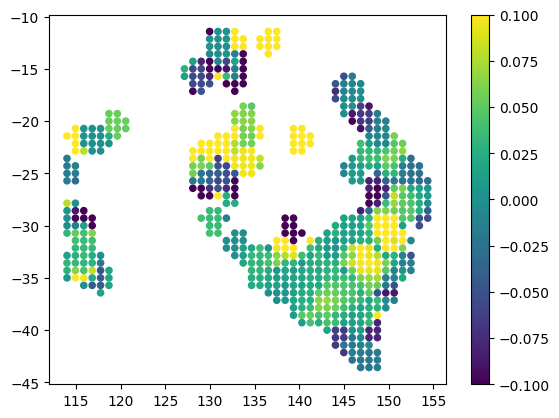

In [11]:
glon = np.linspace(114,160,50)
glat = np.linspace(-45,-10,50)
X,Y  = np.meshgrid(glon,glat)
X = X.flatten()
Y = Y.flatten()
ngrid = len(X) # número total de celdas en la cuadrícula

bcnt        = np.zeros(ngrid) # contador de puntos en cada celda
mn_slope    = np.zeros(ngrid)  # pendiente promedio de cada celda
mn_slope[:] = np.nan           #inicializar con NaN

# Calcular las estadisticas por celdas
for i in range(ngrid):
    
    bdist   = ((X[i]-lon[ipass])**2 + (Y[i]-lat[ipass])**2)
    iloc    = np.where(bdist<2)[0] # índices locales de los úntos cercanos
    jloc    = ipass[iloc] # índices locales de los datos originales
    bcnt[i] = len(jloc)
    if (len(jloc)<1):
        continue
    mn_slope[i] = np.median(tslope[jloc])  # calculo de la mediana

plt.scatter(X,Y,s=100,c=np.log10(bcnt))
#plt.plot(lon[ipass],lat[ipass],'^')
#plt.plot(X,Y,'ro')
plt.colorbar()

plt.figure()
plt.scatter(X,Y,s=20,c=mn_slope,vmin=-0.1,vmax=0.1)
#plt.plot(lon[ipass],lat[ipass],'^')
#plt.plot(X,Y,'ro')
plt.colorbar()
plt.show()